## Exploratory data analysis

Necessary imports

In [38]:
from wordcloud import WordCloud
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np

sns.set()

### Utility fuctions for filtering words
`is_bangla(text: str)` function check if word is bangla word. `is_arabic(text: str)` function check if word is arabic word. `is_english(text: str)` function check if word is english word.

`is_contain_arabic(text: str)` and `is_contain_english(text: str)` function check if a word contain any arabic or english characters.

`clean_special_chars(text: str)` function remove special characters form a word. It remove special characters from left side and right side not inside of the word. 

In [2]:
# Check a text is bangla text
def is_bangla(texts: str) -> bool:
    if len(texts) == 0:
        return False

    included_chars = [
        'ঁ','ং','ঃ','','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ',
        'চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম',
        'য','র','ল','শ','ষ','স','হ','ৰ','ৱ','','৳','ৼ','়','ঽ','া','ি','ী','ু','ূ','ৃ','','ে',
        'ৈ','ো','ৌ','্','ৎ','ৗ','ড়','ঢ়','য়','ৠ','০','১','২','৩','৪','৫','৬','৭৮','৯'
    ]

    for t in texts:
        if t not in included_chars:
            return False
    
    return True

# Check a text is arabic text
def is_arabic(text: str) -> bool:
    code = (1536, 1791)
    if len(text) > 1:
        f = True
        for s in text:
            if ord(s) < code[0] or ord(s) > code[1]:
                return False
        return f

    elif len(text) == 1 and ord(text) >= code[0] and ord(text) <= code[1]:
        return True
    else:
        return False

# Check a text is english text
def is_english(text: str) -> bool:
    code = (0, 127)
    if len(text) > 1:
        f = True
        for s in text:
            if ord(s) < code[0] or ord(s) > code[1]:
                return False
        return f

    elif len(text) == 1 and ord(text) >= code[0] and ord(text) <= code[1]:
        return True
    else:
        return False

# Check if a word character arabic
def is_contain_arabic(text: str) -> bool:
    code = (1536, 1791)
    f = False
    for s in text:
        if ord(s) >= code[0] or ord(s) <= code[1]:
            return True

    return f

# Check if a word character arabic
def is_contain_english(text: str) -> bool:
    code = (0, 127)
    f = False
    for s in text:
        if ord(s) >= code[0] or ord(s) <= code[1]:
            return True

    return f

# Remove left and right side special chars
def clean_special_chars(texts: str) -> str:
    if len(texts) == 0:
        return texts

    i_len = len(texts)

    s_chars = [
        '~', '`', '!', '@', '#', '$', '%', '^', 
        '*', '(', ')', '_', '-', '+', 
        '=', '{', '[', '}', ']', '|', '\\', ':', ';', 
        '"', "'", ',', '.', '?', '/', '—', '৷', '৻', '৳', '৶', '৸', '৴', '৺', 'ॱ', '॰'
        '০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯',
        '’', '‘', '“', '”'
    ]

    n_printable = [2385, 2386, 2387, 2388, 2404, 2405, 2406, 2407, 
                    2408, 2409, 2410, 2411, 2412, 2413, 2414, 2445, 2445]
                    
    for i in range(0, len(texts)):
        if texts[i] not in s_chars and ord(texts[i]) not in n_printable:
            texts = texts[i:]
            break
    
    for i in range(len(texts)-1, -1, -1):
        if texts[i] not in s_chars and ord(texts[i]) not in n_printable:
            texts = texts[0:i+1]
            break

    if i_len == len(texts):
        return ''

    return texts

### Frequency of Words
Create a csv file of frequency of words

In [ ]:
# Count English word from a directory which contains some text files.
english_contain = {}
authors = []
names = []
english_words = []
for directory, subdir, flist in os.walk('data'):
    for file_name in flist:
        c = 0
        if len(file_name) > 4 and file_name[-4:] == '.txt':
            with open(directory + '/' + file_name) as f:
                text = f.read()
                text = text.split(' ')

                for t in text:
                    if is_english(t):
                        c += 1

            authors.append(directory)
            names.append(file_name)
            english_words.append(c)

df = pd.DataFrame({'author': authors, 'name': names, 'english_word_count': english_words})
df.to_csv('english_contain.csv', index=False)

In [ ]:
# Count Arabic word from a directory which contains some text files.
alltext = []
arabic_contain = pd.read_csv('arabic_contain.csv')
english_contain = pd.read_csv('english_contain.csv')
for directory, subdir, flist in os.walk('data'):
    for file_name in flist:
        c = 0
        if(len(file_name) > 4 and file_name[-4:] == '.txt' 
            and english_contain.loc[english_contain['name'] == file_name].english_word_count.tolist()[0] < 5000 
            and arabic_contain.loc[arabic_contain['name'] == file_name].arabic_word_count.tolist()[0] < 500):
            
            with open(directory + '/' + file_name) as f:
                text = f.read()
                text = text.split(' ')

                for t in text:
                    t = clean_special_chars(t)
                    if len(t) > 1 and is_bangla(t):
                        if '\n' in t:
                            t = t.replace('\n', ' ')
                            t = t.strip()
                            t = t.split(' ')
                            alltext += t
                        else:
                            alltext.append(t)
    
    print('Running in directory: ', directory + ''.join([' ' for _ in range(30)]), end='\r')

with open('alltext.txt', 'w') as f:
    f.write(' '.join(alltext))

### Load texts from a file contain all texts

In [3]:
# Load data
text = ''
with open('data/new_alltext.txt', encoding="utf-8") as f:
    text = f.read()

In [ ]:
# Process data by removing word with unnecessary characters 
with open('data/new_alltext.txt', 'w', encoding="utf-8") as f:
    words = text.split(' ')
    for word in words:
        word = clean_special_chars(word)
        if is_bangla(word) and word != ' ' and len(word) >= 1:
            f.write(word + ' ')

### Create a csv of frequency of bangla words

In [ ]:
# Create a csv of frequency of words
str_list = text.split(' ')
words = []
count_l = []
h = {}
for s in str_list:
    try:
        h[s] += 1
    except KeyError:
        h[s] = 1

for key in h.keys():
    words.append(key)
    count_l.append(h[key])

df = pd.DataFrame({'word': words, 'count': count_l})
df.to_csv('word_frequency.csv', index=False)

### Bar chart of frequency or words

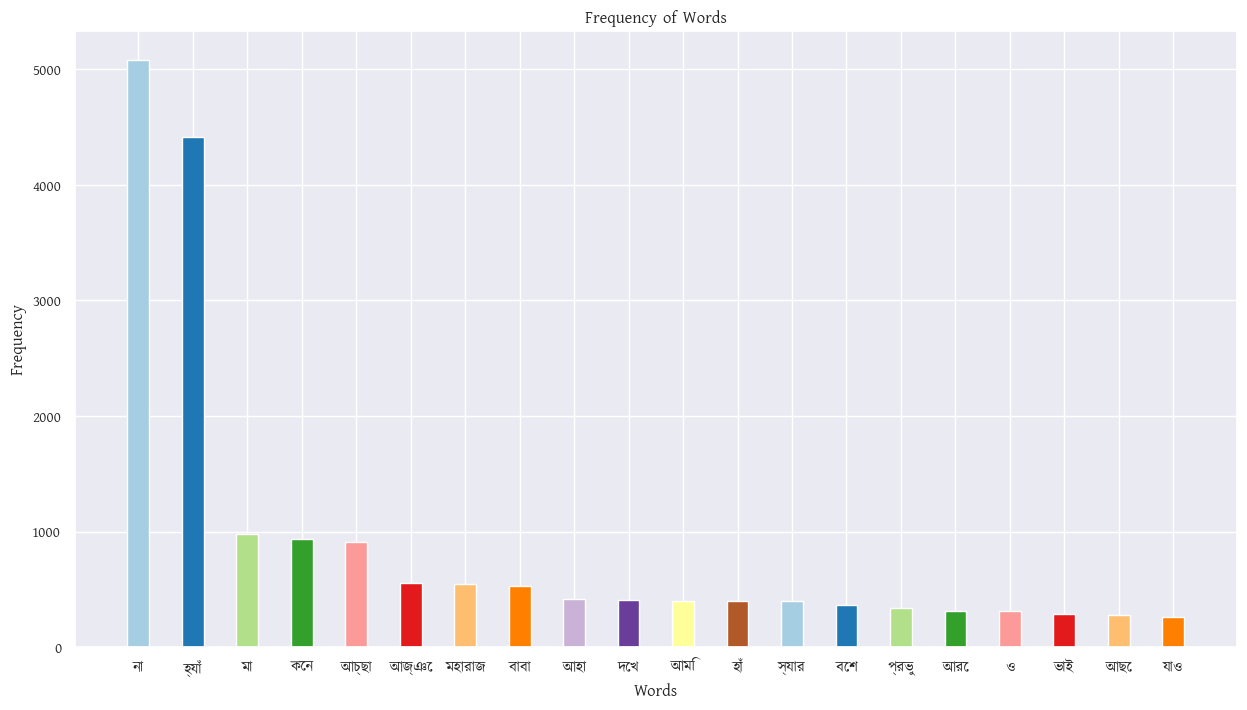

In [73]:
plt.rcParams["font.family"] = 'kalpurush'
plt.rcParams['figure.figsize'] = (15, 8)

wf_df = pd.read_csv('data/word_frequency_sorted.csv')
prop = fm.FontProperties(fname='kalpurush.ttf')
 
# creating the bar plot
my_cmap = plt.get_cmap("Paired")
plt.bar(wf_df['word'][:20], wf_df['count'][:20], width = 0.4, color=my_cmap.colors)
 
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Words")
plt.show()

### Horizontal bar chart of frequency of words

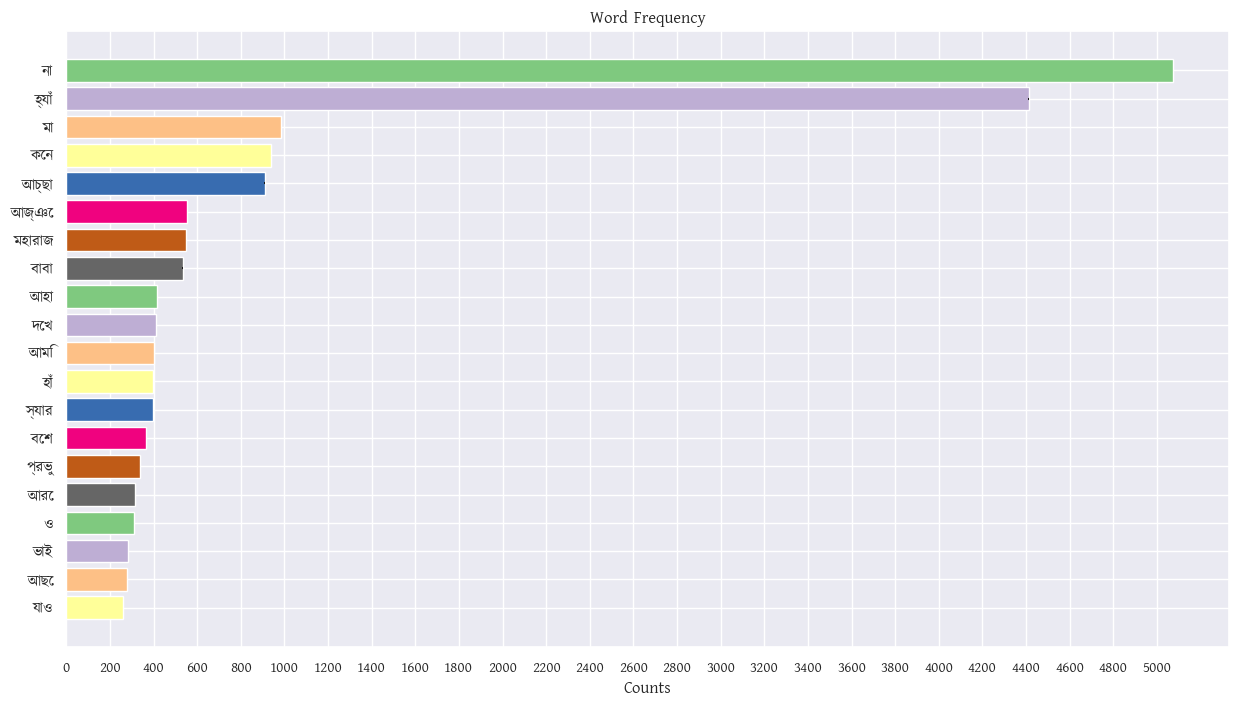

In [74]:
fig, ax = plt.subplots()

words = wf_df['word'][:20]
y_pos = np.arange(len(words))
counts = wf_df['count'][:20]
error = np.random.rand(len(words))
my_cmap = plt.get_cmap("Accent")
ax.barh(y_pos, counts, xerr=error, align='center', color=my_cmap.colors)
ax.set_yticks(y_pos, labels=words)
ax.set_xticks(np.arange(0, wf_df['count'][0], step=200))
ax.invert_yaxis()
ax.set_xlabel('Counts')
ax.set_title('Word Frequency')

plt.show()

### Create of wordcloud object from all bangla texts

In [75]:
# Create and generate a word cloud image:
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(width=1000, height=500, background_color ='white', font_path='kalpurush.ttf', regexp=rgx).generate(text)

### Save wordcloud as a image

In [346]:
# Save wordcloud image
wordcloud.to_file('wordcloud.png')

### Plot wordcloud image

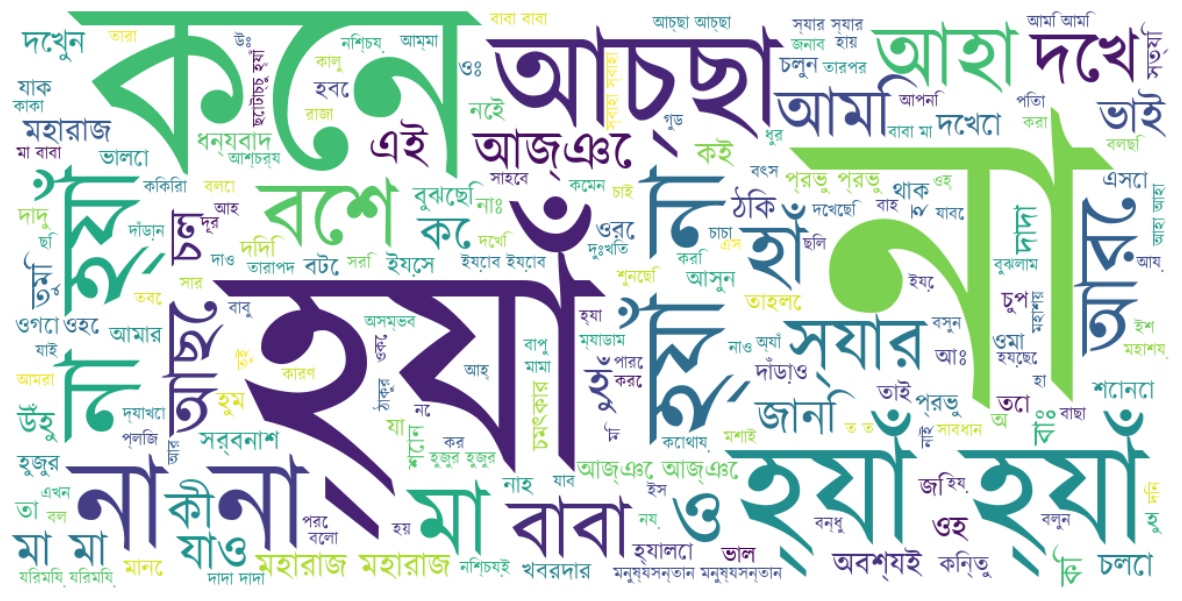

In [76]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()